In [1]:
import cv2, json, wandb
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

from utils import plot_images

In [2]:
api = wandb.Api()
artifact = api.artifact("g1y5x3/fisheye-challenge/run_86xrntim_model:best")
artifact_dir = artifact.download()
artifact_dir

wandb: Downloading large artifact run_86xrntim_model:best, 130.55MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.4


'/workspace/fisheye_challenge/artifacts/run_86xrntim_model:v0'

In [3]:
model = YOLO(f"{artifact_dir}/best.pt")

In [4]:
train_dir = "/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/train/"
gt_dir = "/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/train/train.json"
with open(gt_dir) as f: gts   = json.load(f)
gt_img, gt_ann = gts["images"], gts["annotations"]

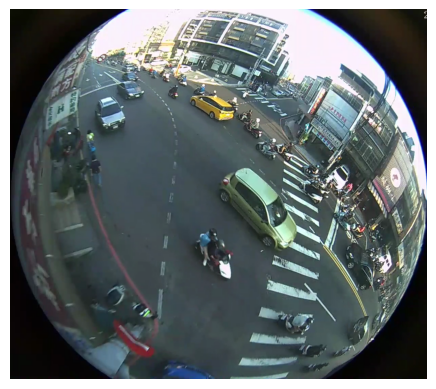

In [5]:
idx = "camera3_A_100.png"

img = Image.open(train_dir + "images/" + idx)
plt.imshow(img)
plt.axis('off') # Remove axes for cleaner display
plt.show()

## Ground Truth

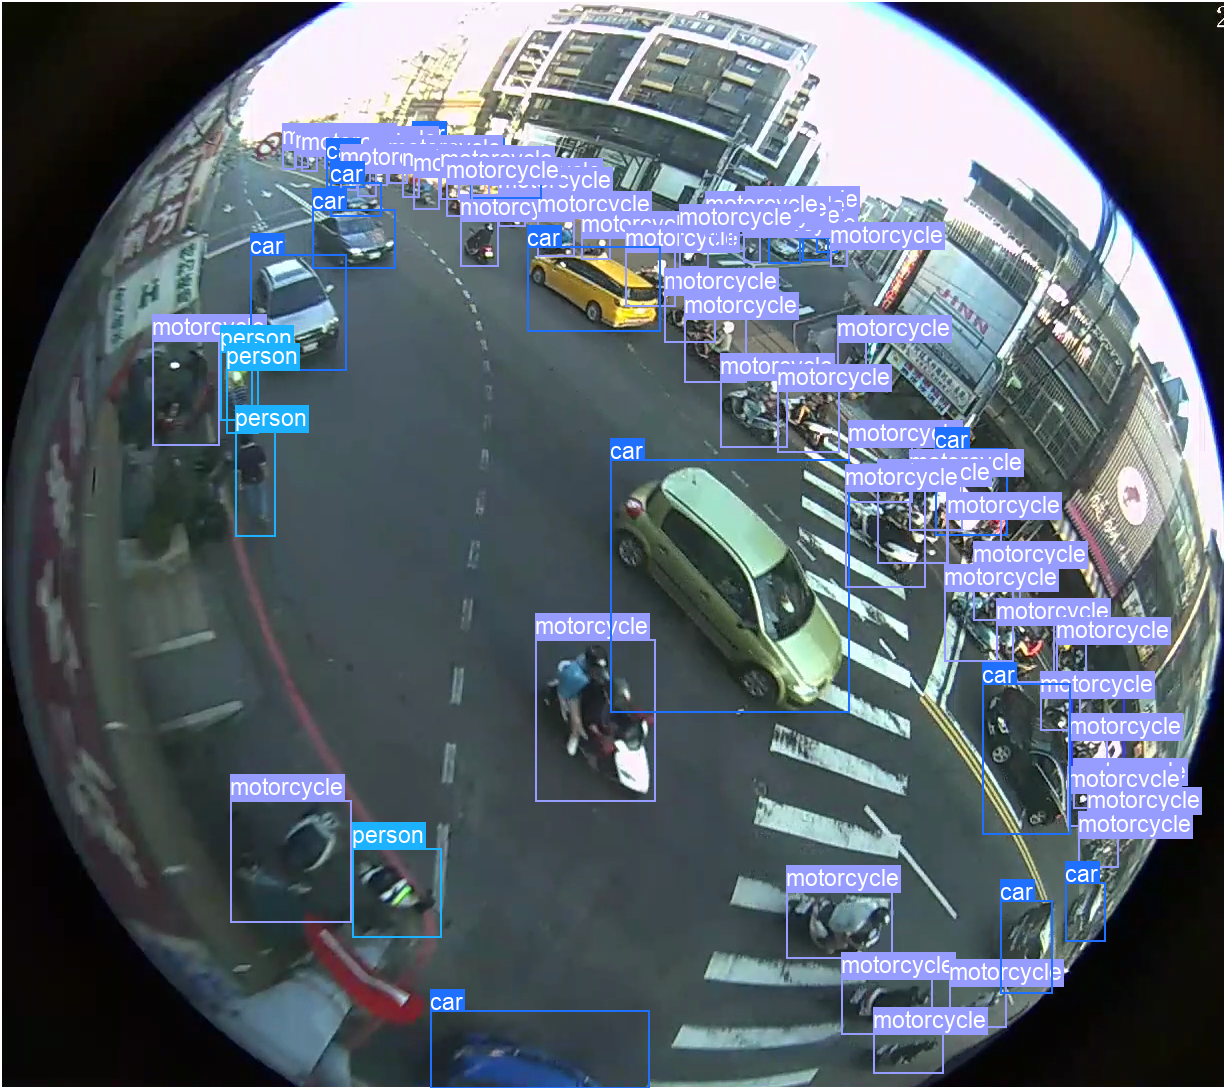

In [6]:
img = cv2.imread(train_dir + "images/" + idx)

# get ground truth
img_id = [gt["id"] for gt in gt_img if gt["file_name"] == idx]
bboxes = np.array([gt["bbox"] for gt in gt_ann if gt["image_id"] == img_id[0]])
cls = np.array([gt["category_id"] for gt in gt_ann if gt["image_id"] == img_id[0]])
names = {0: 'bus', 1: 'motorcycle', 2: 'car', 3: 'person', 4: 'truck'}

img_gt = plot_images(img, cls, bboxes, None, names, plot=True)

In [18]:
results = model.predict(img, project="fisheye", name="results", visualize=True, show_labels=False, show_conf=False)


Saving fisheye/results/image0/stage0_Conv_features.png... (32/80)
Saving fisheye/results/image0/stage1_Conv_features.png... (32/160)
Saving fisheye/results/image0/stage2_C2f_features.png... (32/160)
Saving fisheye/results/image0/stage3_Conv_features.png... (32/320)
Saving fisheye/results/image0/stage4_C2f_features.png... (32/320)
Saving fisheye/results/image0/stage5_Conv_features.png... (32/640)
Saving fisheye/results/image0/stage6_C2f_features.png... (32/640)
Saving fisheye/results/image0/stage7_Conv_features.png... (32/640)
Saving fisheye/results/image0/stage8_C2f_features.png... (32/640)
Saving fisheye/results/image0/stage9_SPPF_features.png... (32/640)
Saving fisheye/results/image0/stage10_Upsample_features.png... (32/640)
Saving fisheye/results/image0/stage11_Concat_features.png... (32/1280)
Saving fisheye/results/image0/stage12_C2f_features.png... (32/640)
Saving fisheye/results/image0/stage13_Upsample_features.png... (32/640)
Saving fisheye/results/image0/stage14_Concat_feature

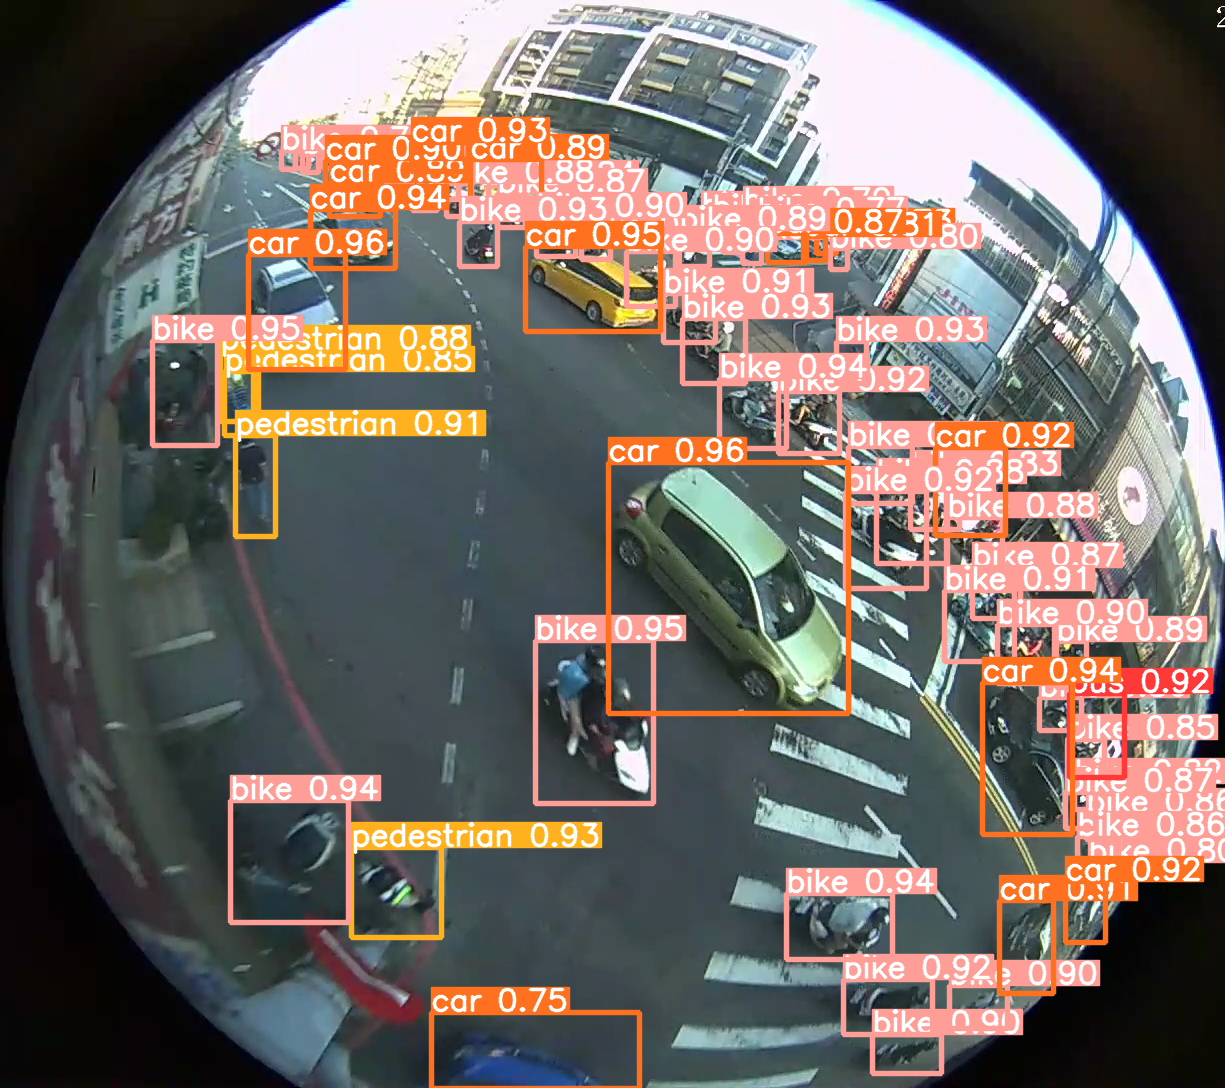

In [10]:
results[0].show()

## Inspect the receptive field of the model

In [15]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-2): 3 x Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplac

AttributeError: 'DetectionModel' object has no attribute 'forward_once'